# **Random Forest**

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import useful functions for the random forest algorithm
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [239]:
from google.colab import drive # Import the drive function from the google.colab module
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div align = "justify">

## **Step 1:** Data preparation

The dataset was obtain from the UC Irvine Machine Learning Repository, particularly from the processed.cleveland.data file.

[Heart Disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

</div>

In [240]:
# Load data
df_cleveland = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence/Supervised learning/processed.cleveland.data',
                           header = None)
df_cleveland.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [241]:
# Name of each attribute
columns_names = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "target"  # Target variable
}

In [242]:
# Change the name of the future for enhancing interpretability
df_cleveland.rename(columns=columns_names, inplace=True) # 'inplace=True' changes the columns in the current dataframe
df_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [243]:
# There are 6 occurrences of '?' values
print("Number of missing values: ", (df_cleveland == '?').sum().sum())

# Replace '?' with NaN
df_cleveland.replace('?', np.nan, inplace=True)
# Drop those columns that have nan
df_cleveland.dropna(inplace=True)

Number of missing values:  6


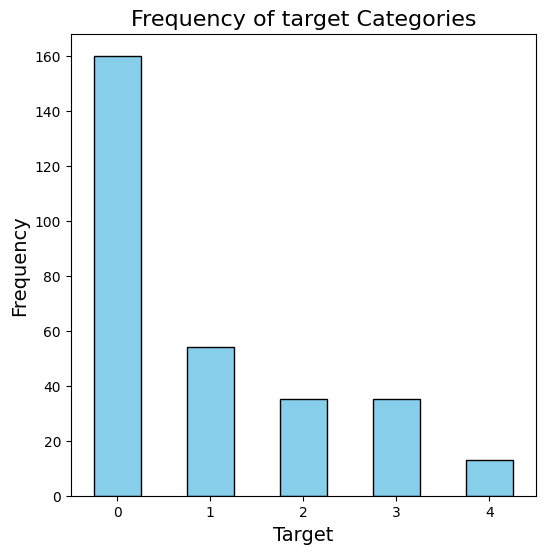

In [244]:
# Count occurrences of each category in 'target'
target_counts = df_cleveland["target"].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 6))
target_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Frequency of target Categories', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [245]:
X_cleveland = df_cleveland.iloc[:,:-1].values # Obtain the values of the model
X_cleveland[1:5] # Show array from position 1 to 5

array([[67.0, 1.0, 4.0, 160.0, 286.0, 0.0, 2.0, 108.0, 1.0, 1.5, 2.0,
        '3.0', '3.0'],
       [67.0, 1.0, 4.0, 120.0, 229.0, 0.0, 2.0, 129.0, 1.0, 2.6, 2.0,
        '2.0', '7.0'],
       [37.0, 1.0, 3.0, 130.0, 250.0, 0.0, 0.0, 187.0, 0.0, 3.5, 3.0,
        '0.0', '3.0'],
       [41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 2.0, 172.0, 0.0, 1.4, 1.0,
        '0.0', '3.0']], dtype=object)

In [246]:
y_labels = df_cleveland.iloc[:, -1].values # Obtain the last column (which are the predictions)
y_labels[1:10] # Show Numpy array from position 1 to 10

array([2, 1, 0, 0, 0, 3, 0, 2, 1])

In [247]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_cleveland, y_labels,
                                                    test_size=0.2)

In [248]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<div align = "justify">

## **Step 2:** Random Forest classifier

The Random Forest classifier model is created below.

</div>

In [249]:
classifier_cleveland = RandomForestClassifier(n_estimators=100, # How many decision trees will be created
                                              max_depth=2,# Depth of the tree
                                              class_weight='balanced',
                                              )
classifier_cleveland.fit(X_train_resampled, y_train_resampled) # Train the model

# Predict with the test dataset
y_pred = classifier_cleveland.predict(X_test)

<div align = "justify">

## **Step 3:** Model evaluation
</div>

In [250]:
accuracy = accuracy_score(y_test, y_pred)
cleveland_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy} \n")
print(f"CLASSIFICATION REPORT: \n\n {cleveland_report}")

Accuracy: 0.5666666666666667 

CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.11      0.11      0.11         9
           2       0.33      0.20      0.25         5
           3       0.25      0.11      0.15         9
           4       0.43      0.60      0.50         5

    accuracy                           0.57        60
   macro avg       0.38      0.38      0.37        60
weighted avg       0.52      0.57      0.54        60



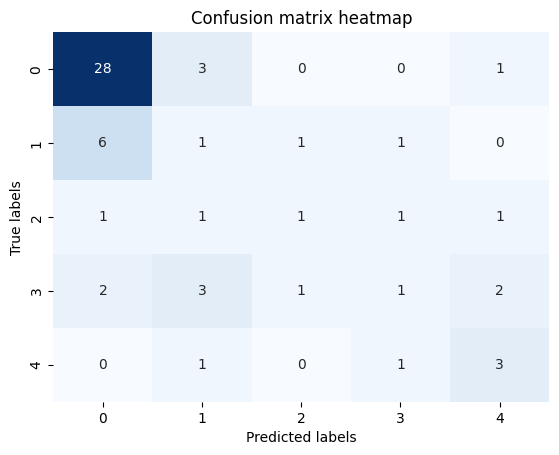

In [251]:
# Creeate confusion matrix for visualizing correct predictions
conf_matrix = confusion_matrix(y_test, y_pred)

#plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=sorted(df_cleveland["target"].unique()),
            yticklabels=sorted(df_cleveland["target"].unique()))

plt.title('Confusion matrix heatmap')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

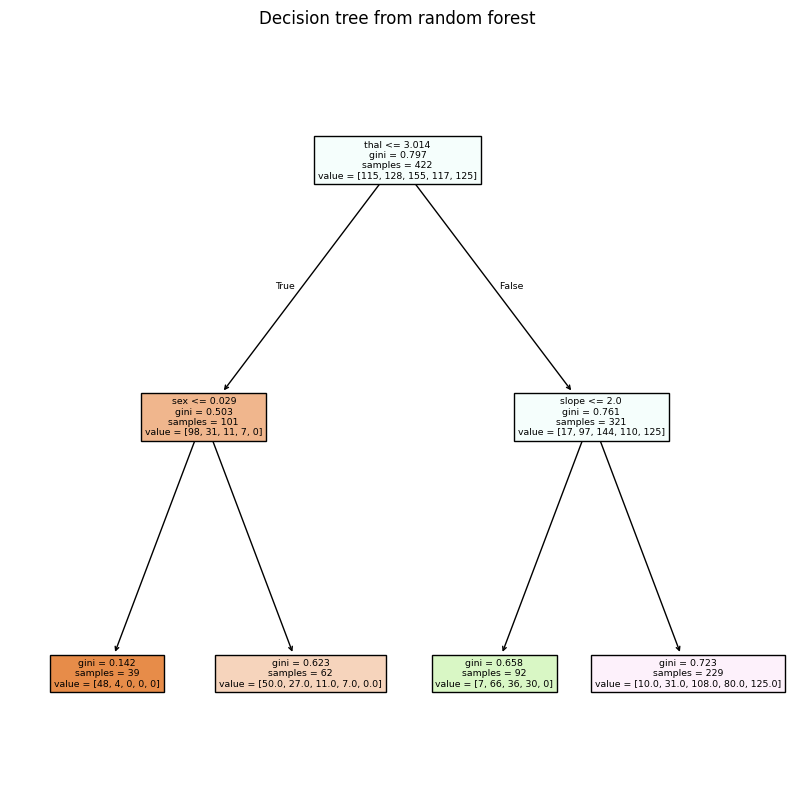

In [252]:
# Visualize a single decision tree from the random forest
plt.figure(figsize=(10, 10))

# Extract the first tree (we can select a different tree by changing the index)
tree.plot_tree(classifier_cleveland.estimators_[0],
               feature_names=df_cleveland.columns,
               filled=True)

plt.title('Decision tree from random forest')
plt.show()